In [ ]:
import splitfolders

data = ""
splitfolders.ratio(data, output = "", ratio=(8.0, 0.1, 0.1))

In [1]:
train = r"D:\Datasets\weed data(collected)\train"
val = r"D:\Datasets\weed data(collected)\val"
test = r"D:\Datasets\weed data(collected)\test"

In [9]:
image_width = 80
image_height = 80
batch_size = 10

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
    rotation_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode = 'nearest'
)

train = datagen.flow_from_directory(train,
                                   batch_size = batch_size,
                                   target_size = (image_width, image_height),
                                   shuffle = True)
val = datagen.flow_from_directory(val,
                                 batch_size = batch_size,
                                 target_size = (image_width, image_height),
                                 shuffle = True)
test = datagen.flow_from_directory(test,
                                  batch_size = batch_size,
                                  target_size = (image_width, image_height),
                                  shuffle = True)

Found 478 images belonging to 5 classes.
Found 57 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), input_shape = (image_width, image_height, 3), activation = "relu", padding = "valid"))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Conv2D(32, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(5, activation = "softmax"))

          
model.compile(optimizer = "adagrad", loss = "categorical_crossentropy", metrics = ["Accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 39, 39, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 18, 18, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [21]:
train = model.fit(train,
                 validation_data = val,
                 epochs = 10,
                 batch_size = 200)

Epoch 1/10
48/48 [==============================] - 68s 1s/step - loss: 1.6029 - Accuracy: 0.2218 - val_loss: 1.5939 - val_Accuracy: 0.2281
Epoch 2/10
48/48 [==============================] - 35s 716ms/step - loss: 1.5794 - Accuracy: 0.2594 - val_loss: 1.5762 - val_Accuracy: 0.2105
Epoch 3/10
48/48 [==============================] - 33s 698ms/step - loss: 1.5636 - Accuracy: 0.2469 - val_loss: 1.5579 - val_Accuracy: 0.2982
Epoch 4/10
48/48 [==============================] - 35s 734ms/step - loss: 1.5411 - Accuracy: 0.3264 - val_loss: 1.5564 - val_Accuracy: 0.2632
Epoch 5/10
48/48 [==============================] - 36s 761ms/step - loss: 1.5161 - Accuracy: 0.3222 - val_loss: 1.5361 - val_Accuracy: 0.3333
Epoch 6/10
48/48 [==============================] - 36s 759ms/step - loss: 1.4961 - Accuracy: 0.3766 - val_loss: 1.5223 - val_Accuracy: 0.4386
Epoch 7/10
48/48 [==============================] - 35s 718ms/step - loss: 1.4736 - Accuracy: 0.4561 - val_loss: 1.4967 - val_Accuracy: 0.4211
Ep

In [22]:
model.evaluate(test)

7/7 [==============================] - 8s 1s/step - loss: 1.3911 - Accuracy: 0.4677


[1.3910610675811768, 0.4677419364452362]

In [24]:
accuracy = train.history["Accuracy"]
val_accuracy = train.history["val_Accuracy"]

loss = train.history["loss"]
val_loss = train.history["val_loss"]

epochs = range(len(accuracy))

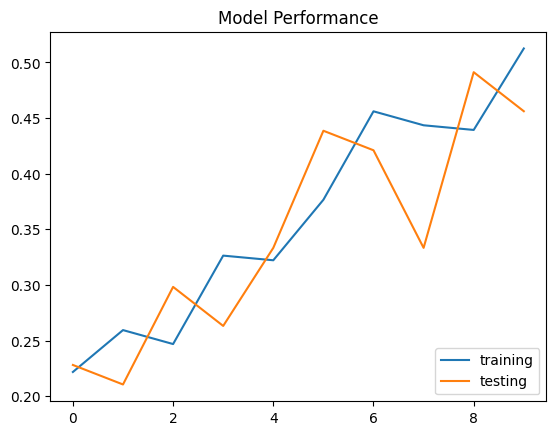

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, label = "training")
plt.plot(epochs, val_accuracy, label = "testing")

plt.title("Model Performance")
plt.legend(loc = "lower right")
plt.figure()
plt.show()
